## Importing Libraries

In [2]:

# 📦 Data Handling
import pandas as pd
import numpy as np


# 📊 Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# 📆 Date/Time Parsing
from datetime import datetime


# 🛠️ Warnings Handling
import warnings
warnings.filterwarnings('ignore')


# 📈 Dashboard (Streamlit)
import streamlit as st


## Loading Dataset

In [4]:
# Load the dataset
df = pd.read_csv("india_pakistan_conflict.csv")

# Display the shape
print("✅ Dataset Loaded Successfully!")


✅ Dataset Loaded Successfully!


## Shape of Dataset

In [10]:
# 📦 BASIC OVERVIEW

# Convert column names to consistent format (optional)
df.columns = df.columns.str.strip()

# Dataset shape
print(f"🧾 Number of Rows: {df.shape[0]}")
print(f"🧱 Number of Columns: {df.shape[1]}")

# Data types
print("\n📘 Data Types:")
print(df.dtypes)

# Null values
print("\n🧹 Missing Values:")
print(df.isnull().sum())

# Unique values per column
print("\n🔎 Unique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")



🧾 Number of Rows: 9
🧱 Number of Columns: 14

📘 Data Types:
Date                       object
Event Description          object
Escalation Level            int64
Event Type                 object
Triggering Incident        object
Indian Response            object
Pakistani Response         object
Civilian Impact            object
Military Casualties        object
Diplomatic Outcome         object
Location                   object
Duration                   object
International Mediation    object
Ceasefire Status           object
dtype: object

🧹 Missing Values:
Date                       0
Event Description          0
Escalation Level           0
Event Type                 0
Triggering Incident        0
Indian Response            0
Pakistani Response         0
Civilian Impact            0
Military Casualties        0
Diplomatic Outcome         0
Location                   0
Duration                   0
International Mediation    0
Ceasefire Status           0
dtype: int64

🔎 Unique Val

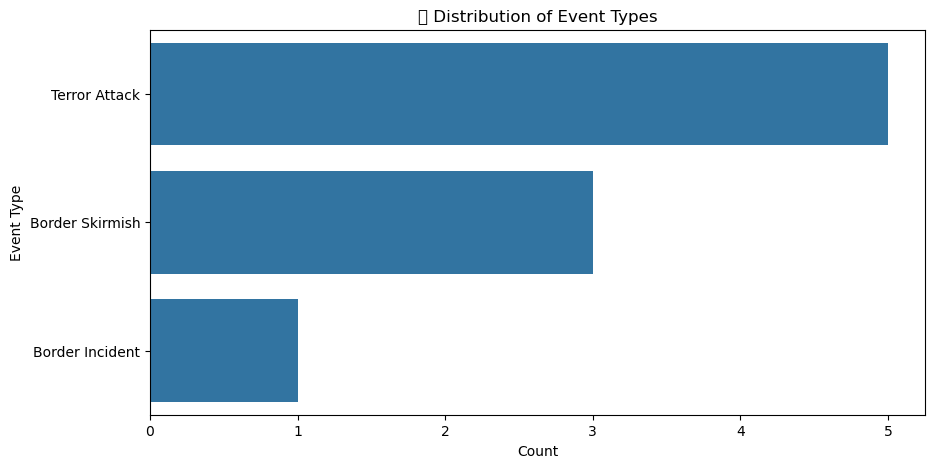

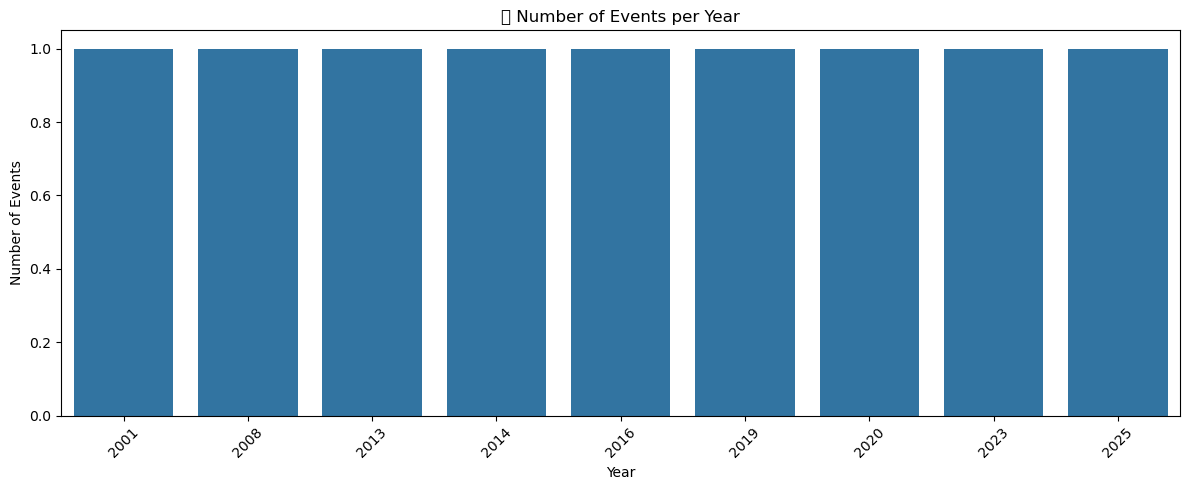

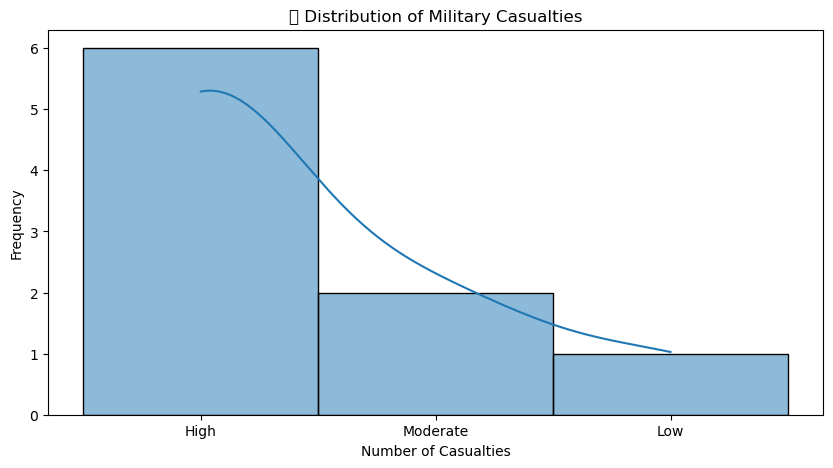

In [11]:
# Convert Date column to datetime and extract year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

import matplotlib.pyplot as plt
import seaborn as sns

# Event type distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Event Type', order=df['Event Type'].value_counts().index)
plt.title("📊 Distribution of Event Types")
plt.xlabel("Count")
plt.ylabel("Event Type")
plt.show()

# Year-wise event frequency
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].dropna().unique()))
plt.title("📆 Number of Events per Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Military casualties distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Military Casualties'], bins=30, kde=True)
plt.title("💀 Distribution of Military Casualties")
plt.xlabel("Number of Casualties")
plt.ylabel("Frequency")
plt.show()


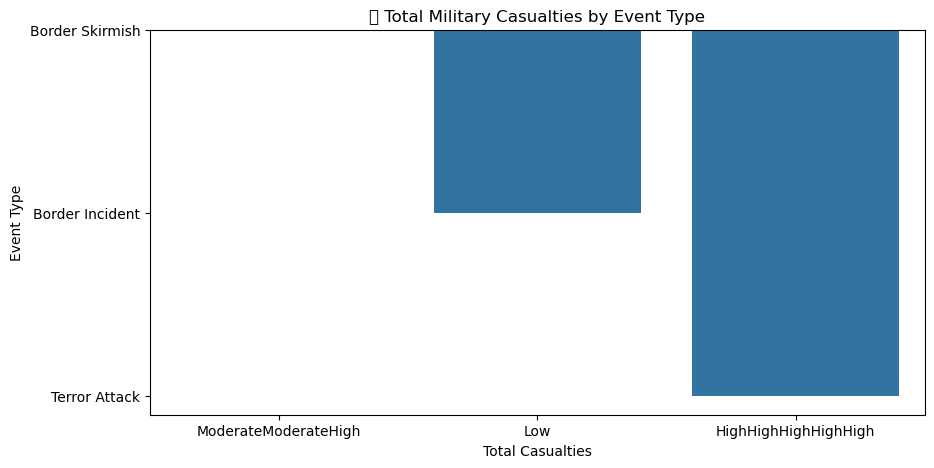

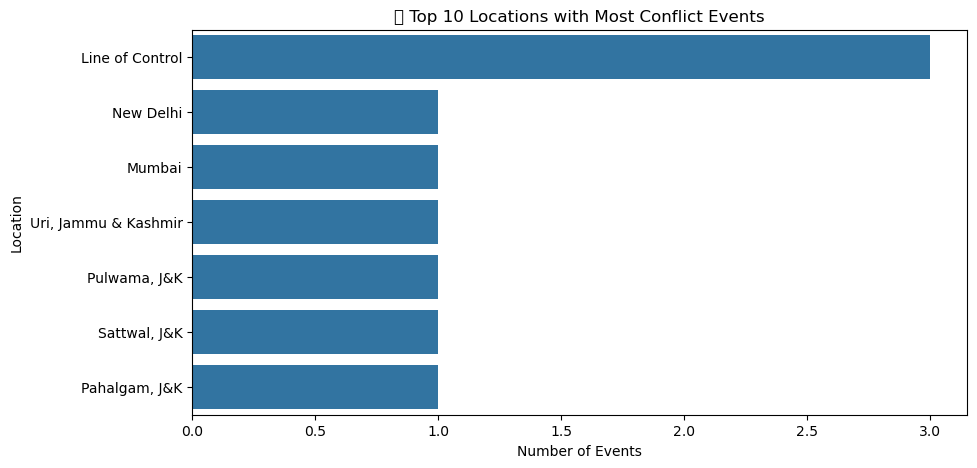

In [12]:
# Total casualties by event type
casualties_by_type = df.groupby('Event Type')['Military Casualties'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=casualties_by_type.values, y=casualties_by_type.index)
plt.title("🔥 Total Military Casualties by Event Type")
plt.xlabel("Total Casualties")
plt.ylabel("Event Type")
plt.show()

# Top 10 locations by number of events
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("📍 Top 10 Locations with Most Conflict Events")
plt.xlabel("Number of Events")
plt.ylabel("Location")
plt.show()


In [13]:
print(df.columns)


Index(['Date', 'Event Description', 'Escalation Level', 'Event Type',
       'Triggering Incident', 'Indian Response', 'Pakistani Response',
       'Civilian Impact', 'Military Casualties', 'Diplomatic Outcome',
       'Location', 'Duration', 'International Mediation', 'Ceasefire Status',
       'Year'],
      dtype='object')
